## In this notebook, the impact of changing the LJ DR on Background is studied
## The DR Choices are: [0.1, 0.2, 0.3, 0.4]
## The following quantities are studied:
## - nLJ, nEGMLJ, nMuLJ
## - mJJ

In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea.nanoevents import NanoAODSchema
from coffea import processor
# local 
sidm_path = str(os.getcwd()).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import sidm_processor, utilities, scaleout
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
import warnings
warnings.filterwarnings(action='once')
import numpy as np

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

Connection method: Direct,
Dashboard: /user/scampbell10@crimson.ua.edu/proxy/8787/status,
Comm: tls://192.168.202.18:8786,Workers: 0
Dashboard: /user/scampbell10@crimson.ua.edu/proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [11]:
## loading in the samples
samples = [
    #'TTJets',
    # 'QCD_Pt170To300',
    # 'QCD_Pt300To470',
    # 'QCD_Pt470To600',
    'QCD_Pt600To800',
    'QCD_Pt80To120',
]


## can set max_files=-1 to run over full statistics 
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2", max_files=250, location_cfg="backgrounds.yaml")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    processor.DaskExecutor(client=client),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    #maxchunks=1,
)


channels = ['base_LJPTGT30'] 
p = sidm_processor.SidmProcessor(
    channels,
    [
        "lj_base",
        'mu_lj_base',
        'egm_lj_base',
        
    ],
    unweighted_hist=True,
    lj_reco_choices=['0.1', '0.2', '0.3', "0.4"],
)

output = runner.run(fileset, treename="Events", processor_instance=p)
out = output["out"]

[########################################] | 100% Completed | 36min 58.4s

In [12]:
def returnLxy(text):
    Lxy = {
        '0.3 cm': ['0p01', '0p2', '0p048'],
        '150 cm': ['5p0', '100p0', '24p0'],
        '300 cm': ['10p0', '200p0', '48p0'],
    }
    for key in Lxy.keys():

        if text in Lxy[key]:
            return key
        else:
            continue
            
legend_entries = [s[6:] for s in samples]

def stringReplace(string):
    if 'p' in string:
        stringNew = string.replace('p', '.')
    else:
        stringNew = string
    return stringNew

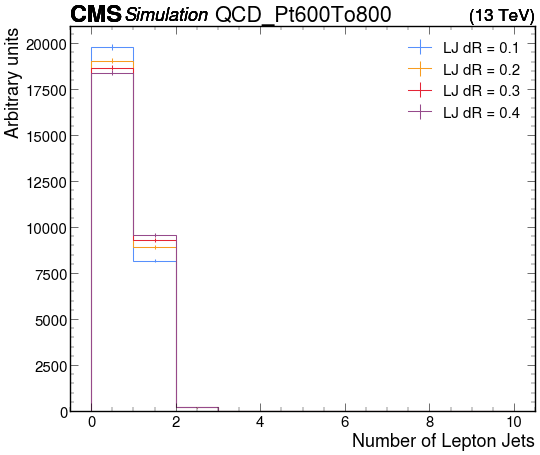

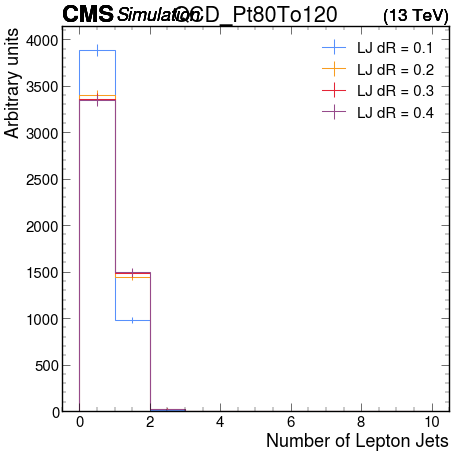

<Figure size 500x500 with 0 Axes>

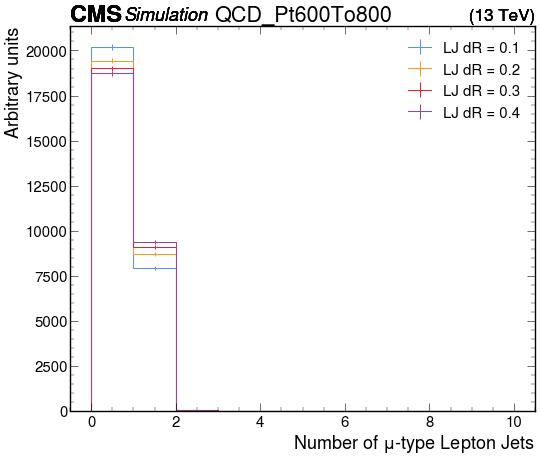

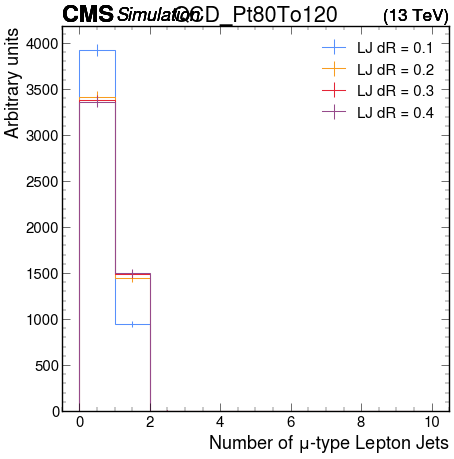

<Figure size 500x500 with 0 Axes>

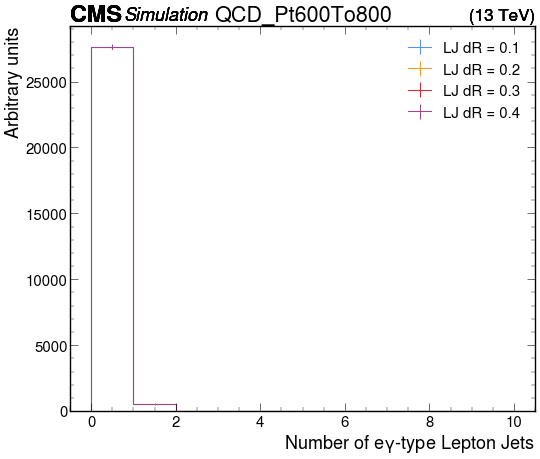

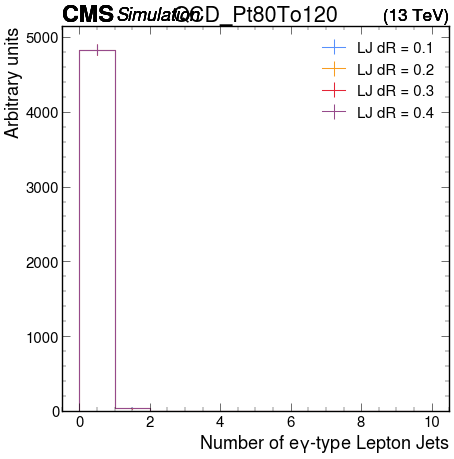

<Figure size 500x500 with 0 Axes>

In [13]:
nplots = 1
legend_entries = [s[6:] for s in samples]
path = './Background_nLJ-dR'

plt.subplots(1, nplots, figsize=(12, 10))
# Check if the directory already exists
if not os.path.exists(path):
    os.mkdir(path)
    
    
for i, sample in enumerate(samples):
    plt.title(f'{sample}')
    #mass = stringReplace(sample.split('_')[2]).split('G')[0]
    #decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot(out[sample]["hists"]["lj_n"]['0.1', channels[0], :], density=False, label='LJ dR = 0.1')
    utilities.plot(out[sample]["hists"]["lj_n"]['0.2', channels[0], :], density=False, label='LJ dR = 0.2')
    utilities.plot(out[sample]["hists"]["lj_n"]['0.3', channels[0], :], density=False, label='LJ dR = 0.3')
    utilities.plot(out[sample]["hists"]["lj_n"]['0.4', channels[0], :], density=False, label='LJ dR = 0.4')
    
    #utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio_onePhoton"][channels[3], :], density=False, label='$e\gamma$ LJ Neither')
    
    plt.legend(alignment="left")
    plt.ylabel("Arbitrary units")
    
    # Get the current axes object
    ax = plt.gca()

    # Add text in the bottom-left corner of the plot
    # ax.text(0.5, 0.05, f'{legend_entries[i]}', transform=ax.transAxes, 
    #         fontsize=25, color='k', ha='left', va='bottom')
    #plt.show()
    #plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.savefig(f'{path}/nLJ_{sample}_dR.png', dpi=300, facecolor='w')
    plt.show()
    plt.clf()
plt.subplots(1, nplots, figsize=(12, 10))   
for i, sample in enumerate(samples):
    #mass = stringReplace(sample.split('_')[2]).split('G')[0]
    #decayLen = returnLxy(sample.split('_')[-1][:-2])
    plt.title(f'{sample}')
    utilities.plot(out[sample]["hists"]["mu_lj_n"]['0.1', channels[0], :], density=False, label='LJ dR = 0.1')
    utilities.plot(out[sample]["hists"]["mu_lj_n"]['0.2', channels[0], :], density=False, label='LJ dR = 0.2')
    utilities.plot(out[sample]["hists"]["mu_lj_n"]['0.3', channels[0], :], density=False, label='LJ dR = 0.3')
    utilities.plot(out[sample]["hists"]["mu_lj_n"]['0.4', channels[0], :], density=False, label='LJ dR = 0.4')
    
    #utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio_onePhoton"][channels[3], :], density=False, label='$e\gamma$ LJ Neither')
    
    plt.legend(alignment="left")
    plt.ylabel("Arbitrary units")
    
    # Get the current axes object
    ax = plt.gca()

    # Add text in the bottom-left corner of the plot
    # ax.text(0.5, 0.05, f'{legend_entries[i]}', transform=ax.transAxes, 
    #         fontsize=25, color='k', ha='left', va='bottom')
    #plt.show()
    #plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.savefig(f'{path}/nmuLJ_{sample}_dR.png', dpi=300, facecolor='w')
    plt.show()
    plt.clf()
plt.subplots(1, nplots, figsize=(12, 10))    
for i, sample in enumerate(samples):
    plt.title(f'{sample}')
    #mass = stringReplace(sample.split('_')[2]).split('G')[0]
    #decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot(out[sample]["hists"]["egm_lj_n"]['0.1', channels[0], :], density=False, label='LJ dR = 0.1')
    utilities.plot(out[sample]["hists"]["egm_lj_n"]['0.2', channels[0], :], density=False, label='LJ dR = 0.2')
    utilities.plot(out[sample]["hists"]["egm_lj_n"]['0.3', channels[0], :], density=False, label='LJ dR = 0.3')
    utilities.plot(out[sample]["hists"]["egm_lj_n"]['0.4', channels[0], :], density=False, label='LJ dR = 0.4')
    
    #utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio_onePhoton"][channels[3], :], density=False, label='$e\gamma$ LJ Neither')
    
    plt.legend(alignment="left")
    plt.ylabel("Arbitrary units")
    
    # Get the current axes object
    ax = plt.gca()

    # # Add text in the bottom-left corner of the plot
    # ax.text(0.5, 0.05, f'{legend_entries[i]}', transform=ax.transAxes, 
    #         fontsize=25, color='k', ha='left', va='bottom')
    #plt.show()
    #plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.savefig(f'{path}/negmLJ_{sample}_dR.png', dpi=300, facecolor='w')
    plt.show()
    plt.clf()

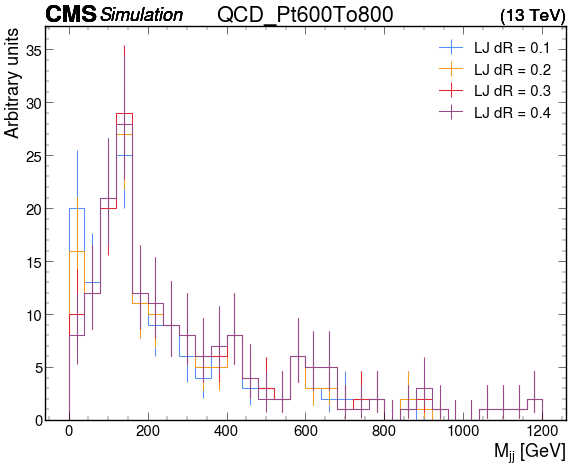

<Figure size 500x500 with 0 Axes>

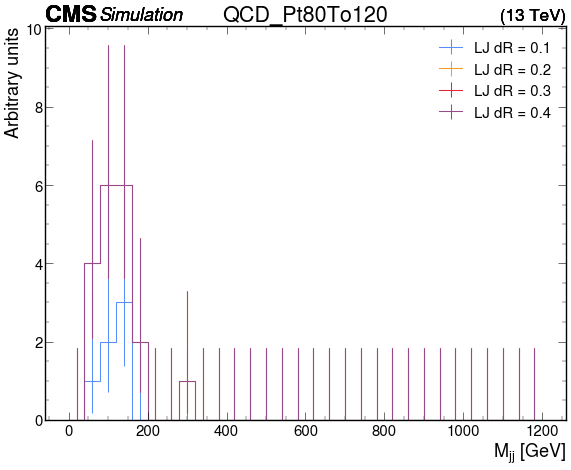

<Figure size 500x500 with 0 Axes>

In [14]:
nplots = 1

path = './Background_invariantMassPlot-DR'
# Check if the directory already exists
if not os.path.exists(path):
    os.mkdir(path)
# number of electrons near dark photon


for i, sample in enumerate(samples):
    plt.subplots(1, nplots, figsize=(12, 10))
    plt.title(f'{sample}')
    #mass = stringReplace(sample.split('_')[2]).split('G')[0]
    #decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot(out[sample]["hists"]["mJJ_2mu2e"]['0.1', channels[0], :], density=False, label='LJ dR = 0.1')
    utilities.plot(out[sample]["hists"]["mJJ_2mu2e"]['0.2', channels[0], :], density=False, label='LJ dR = 0.2')
    utilities.plot(out[sample]["hists"]["mJJ_2mu2e"]['0.3', channels[0], :], density=False, label='LJ dR = 0.3')
    utilities.plot(out[sample]["hists"]["mJJ_2mu2e"]['0.4', channels[0], :], density=False, label='LJ dR = 0.4')
    # utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio"][channels[3], :], density=False, label='No PhoFull5x5SigmaIEtaIEtaCut + No PhoIsoWithEALinScalingCut + LooseID Electrons')
    # utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio"][channels[4], :], density=False, label='LooseID Photons + LooseID Electrons')
    
    
    plt.legend()
    plt.ylabel("Arbitrary units")
    
    #plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    # Apply tight layout to ensure space for the legend
    plt.tight_layout()  # Adjust the right side to make room for the legend
    plt.savefig(f'{path}/plot_LJ_invariant_mass_{sample}.png', dpi=300, facecolor='w')
    plt.show()
    plt.clf()